# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
# https://github.com/wingchen/citipy
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("Assets", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

day = time.strftime("%m/%d/%Y")

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# https://openweathermap.org/current
import openweathermapy.core as owm
import json

settings = {"units": "imperial", "appid": api_key}
summary = ["name", "sys.country", "main.temp", "clouds.all", "wind.speed", "coord.lat", "coord.lon", "main.humidity"]

weather_data = []

print('Beginning Data Retrieval')
print('-'*30)
i = 0
for city in cities:
    try:
        current_weather = owm.get_current(city, **settings)
        data = current_weather(*summary)
        weather_data.append(data)
        # limited to 60 calls per minute
        time.sleep(1)
        i += 1
        print(f"Processing Record {i}: {city.title()}")
    except:
        print(f"{city.title()} not found. Skipping...")
        # make sure rate limit not reached
        time.sleep(1)
        
print('-'*30)
print(f'Data Retrieval Complete. {i} records found')
print('-'*30)

Beginning Data Retrieval
------------------------------
Processing Record 1: Eureka
Processing Record 2: Cabo San Lucas
Taolanaro not found. Skipping...
Processing Record 3: Albany
Processing Record 4: Bima
Processing Record 5: Atuona
Processing Record 6: Busselton
Processing Record 7: Tasiilaq
Processing Record 8: Abu Dhabi
Amderma not found. Skipping...
Processing Record 9: Port Macquarie
Processing Record 10: Hermanus
Processing Record 11: Henties Bay
Processing Record 12: Hasaki
Processing Record 13: Herat
Processing Record 14: Butaritari
Processing Record 15: Mahebourg
Processing Record 16: Saint George
Processing Record 17: Ribeira Grande
Processing Record 18: Barrow
Processing Record 19: Cape Town
Processing Record 20: Rikitea
Processing Record 21: Talnakh
Nizhneyansk not found. Skipping...
Processing Record 22: Puerto Ayora
Processing Record 23: Mareeba
Processing Record 24: Carnarvon
Samusu not found. Skipping...
Processing Record 25: Isangel
Processing Record 26: Mataura
Proc

Processing Record 227: Santana Do Livramento
Processing Record 228: Shubarshi
Bengkulu not found. Skipping...
Processing Record 229: Pangnirtung
Processing Record 230: Bowen
Processing Record 231: Nishihara
Processing Record 232: Camopi
Processing Record 233: Pontes E Lacerda
Processing Record 234: Fort Nelson
Processing Record 235: Muisne
Processing Record 236: Zhengjiatun
Processing Record 237: Morondava
Processing Record 238: Lakhipur
Processing Record 239: Podor
Processing Record 240: Saldanha
Processing Record 241: Chaohu
Processing Record 242: Oussouye
Processing Record 243: Otane
Processing Record 244: Dapaong
Processing Record 245: Uromi
Processing Record 246: Tigil
Processing Record 247: Ossora
Processing Record 248: Sabaudia
Processing Record 249: Ayan
Processing Record 250: Natal
Aporawan not found. Skipping...
Processing Record 251: Sioux Lookout
Processing Record 252: Mackenzie
Processing Record 253: Synya
Processing Record 254: Praia Da Vitoria
Processing Record 255: Emer

Processing Record 457: Banjar
Processing Record 458: Sainte-Rose
Processing Record 459: Zaltan
Processing Record 460: Zhuhai
Processing Record 461: Egvekinot
Processing Record 462: Komsomolskiy
Processing Record 463: Tura
Processing Record 464: Nieves
Processing Record 465: Bad Freienwalde
Processing Record 466: Pierre
Processing Record 467: Tallahassee
Processing Record 468: Buritizeiro
Processing Record 469: Gold Coast
Processing Record 470: Coahuayana
Processing Record 471: Jishou
Processing Record 472: Flin Flon
Processing Record 473: Port Augusta
Uwayl not found. Skipping...
Henzada not found. Skipping...
Malwan not found. Skipping...
Processing Record 474: Brae
Processing Record 475: Riverton
Cam Pha not found. Skipping...
Processing Record 476: Ilukste
Processing Record 477: Qujing
Processing Record 478: Vallenar
Processing Record 479: Chernyshevskiy
Processing Record 480: Iquique
Processing Record 481: Stulovo
Processing Record 482: Vaitape
Processing Record 483: Juneau
Process

### Convert Raw Data to DataFrame

In [7]:
df = pd.DataFrame(weather_data)
df.columns = ["City", "Country", "Temperature (F)", "Cloudiness", "Wind Speed", 
              "Latitude", "Longitude", "Humidity"]
df = df.set_index('City')

# save df to .csv
df.to_csv(output_data_file)

df.head()

,Country,Temperature (F),Cloudiness,Wind Speed,Latitude,Longitude,Humidity
City,,,,,,,
Eureka,US,57.25,90,14.99,40.80,-124.16,67
Cabo San Lucas,MX,67.87,20,3.36,22.89,-109.91,77
Albany,US,35.01,90,5.82,42.65,-73.75,85
Bima,ID,74.57,0,2.77,-8.45,118.73,100
Atuona,PF,80.78,56,17.16,-9.80,-139.03,100


### Plotting the Data

#### Latitude vs. Temperature Plot

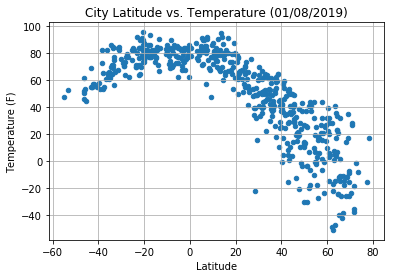

In [29]:
df.plot.scatter(x='Latitude', y='Temperature (F)');
plt.grid();
plt.title(f'City Latitude vs. Temperature ({day})');

save_path = os.path.join('Assets', 'latitude_vs_temperature.png')
plt.savefig(save_path)

#### Latitude vs. Humidity Plot

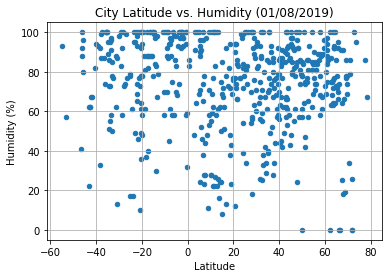

In [28]:
df.plot.scatter(x='Latitude', y='Humidity');
plt.grid();
plt.title(f'City Latitude vs. Humidity ({day})');
plt.ylabel('Humidity (%)');
plt.ylim([-5, 105]);

save_path = os.path.join('Assets', 'latitude_vs_humidity.png')
plt.savefig(save_path)

#### Latitude vs. Cloudiness Plot

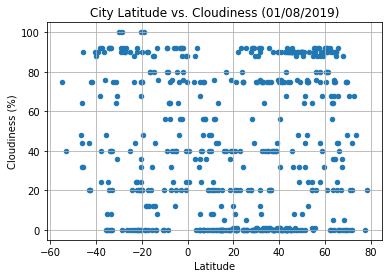

In [27]:
df.plot.scatter(x='Latitude', y='Cloudiness');
plt.grid();
plt.title(f'City Latitude vs. Cloudiness ({day})');
plt.ylabel('Cloudiness (%)');

save_path = os.path.join('Assets', 'latitude_vs_cloudiness.png')
plt.savefig(save_path)

#### Latitude vs. Wind Speed Plot

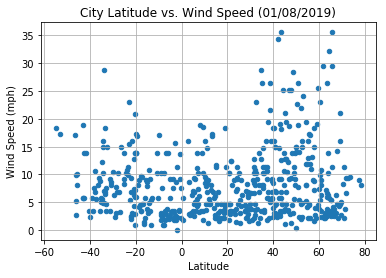

In [26]:
df.plot.scatter(x='Latitude', y='Wind Speed');
plt.grid();
plt.title(f'City Latitude vs. Wind Speed ({day})');
plt.ylabel('Wind Speed (mph)');

save_path = os.path.join('Assets', 'latitude_vs_wind_speed.png')
plt.savefig(save_path)

In [16]:
corr_df = df.loc[:, ["Temperature (F)", "Cloudiness", "Wind Speed", "Humidity"]]
abs_lat = np.absolute(df.loc[:, 'Latitude'])
corr_df['Latitude'] = abs_lat
corr_df.head()

,Temperature (F),Cloudiness,Wind Speed,Humidity,Latitude
City,,,,,
Eureka,57.25,90,14.99,67,40.80
Cabo San Lucas,67.87,20,3.36,77,22.89
Albany,35.01,90,5.82,85,42.65
Bima,74.57,0,2.77,100,8.45
Atuona,80.78,56,17.16,100,9.80


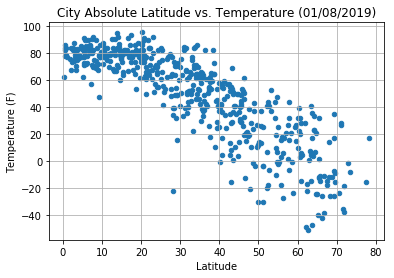

In [30]:
corr_df.plot.scatter(x='Latitude', y='Temperature (F)');
plt.grid();
plt.title(f'City Absolute Latitude vs. Temperature ({day})');

save_path = os.path.join('Assets', 'absolute_latitude_vs_temperature.png')
plt.savefig(save_path)

In [17]:
correlation = corr_df.corr()
correlation

,Temperature (F),Cloudiness,Wind Speed,Humidity,Latitude
Temperature (F),1.000000,-0.041017,0.002443,0.084869,-0.846092
Cloudiness,-0.041017,1.000000,0.081427,0.343155,0.122920
Wind Speed,0.002443,0.081427,1.000000,0.024471,0.192408
Humidity,0.084869,0.343155,0.024471,1.000000,-0.039819
Latitude,-0.846092,0.122920,0.192408,-0.039819,1.000000


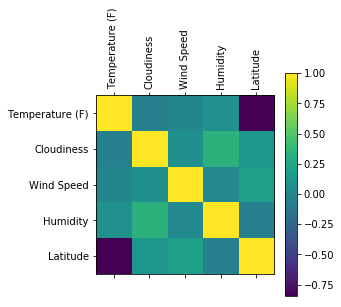

In [25]:
plt.matshow(correlation);
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90);
plt.yticks(range(len(correlation.columns)), correlation.columns);
plt.colorbar();

save_path = os.path.join('Assets', 'correlation_matrix.png')
plt.savefig(save_path)